# 梯度下降法

## 一、导数的意义

物理意义：经常表示瞬间的变化率，在物理量中最常用的有瞬时速度和瞬时加速度。

导数的几何意义：**表示曲线在点处的切线的斜率**。

导数的本质是通过极限的概念对函数进行局部的线性逼近。



## 二、导数的概念

### 平均变化率

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

Text(4, 18, 'x2')

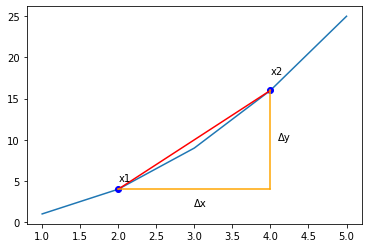

In [4]:
x = np.arange(1,6)
y = x**2
plt.plot(x,y)
plt.plot([2,4],[4,16],'ob')
plt.plot([2,4],[4,16],'r')
plt.plot([2,4],[4,4],color='orange')
plt.plot([4,4],[4,16],color='orange')
plt.text(3,2,'Δx')
plt.text(4.1,10,'Δy')
plt.text(2,5,'x1')
plt.text(4,18,'x2')

x0到x1的平均变化率

$$
平均变化率 = k = \frac{\Delta x}{\Delta y} = \frac{f(x_2)-f(x_1)}{x_2-x_1}
$$

### 导数的概念

$当函数这y=f(x)的自变量x在一点x_{0}上产生一个增量Δx时，函数输出值的增量Δy与自变量增量Δx的比值在Δx趋于0时的极限A如果存在，$
$A即为在x_{0}处的导数，记作f'(x_0)或df(x_0)/dx。$

$$
f'(x_0) = lim_{\Delta x \to 0}\frac{\Delta f}{\Delta x} = lim_{\Delta x \to 0}\frac{f(x_0+\Delta x)-f(x_0)}{\Delta x}
$$

$函数y=f(x)在点x_0处的导数的几何意义，就是曲线y=f(x)在点P(x_0,f(x_0))处的切线的斜率，即曲线y=f(x)在点P(x_0,f(x_0))处的切线的斜率是f'(x_0)$

## 三、梯度下降法

梯度下降法（Gradient descent ）是一个一阶最优化算法，通常也称为最陡下降法 ，要使用梯度下降法找到一个函数的局部极小值 ，必须向函数上当前点对应梯度（或者是近似梯度）的反方向的规定步长距离点进行迭代搜索。 如果相反地向梯度正方向迭代进行搜索，则会接近函数的局部极大值点；这个过程则被称为梯度上升法 ，相反则称之为梯度下降法。

### 理解

假设这样一个场景：一个人需要从山的某处开始下山，尽快到达山底。在下山之前他需要确认两件事：

- 下山的方向
- 下山的距离

这是因为下山的路有很多，他必须利用一些信息，找到从该处开始最陡峭的方向下山，这样可以保证他尽快到达山底。此外，这座山最陡峭的方向并不是一成不变的，每当走过一段规定的距离，他必须停下来，重新利用现有信息找到新的最陡峭的方向。通过反复进行该过程，最终抵达山底。

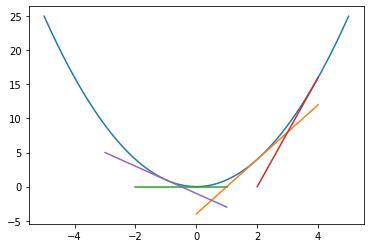

In [21]:
from sympy import *
import numpy as np

x = np.linspace(-5,5,1000)

def func(x):
    return x**2

# 画出曲线图
plt.plot(x,func(x))

# 对曲线求导，并返回某个点的导数
def numeric_diff(x0):
    x = symbols('x')
    y = x**2
    k = diff(y, x).subs(x, x0)
    return k

# 选择点（2,4）
def get_line_func(x):
    k = numeric_diff(x)    # 求出该点的导数
    b = func(x) - k*x    # 求出该点的截距
    return np.poly1d([k,b])

# 点（2，4）的切线
f2 = get_line_func(2)
plt.plot(np.arange(0,5),f2(np.arange(0,5)))
# 点（0，0）的切线
f0 = get_line_func(0)
plt.plot(np.arange(-2,2),f0(np.arange(-2,2)))
# 点（4，16）的切线
f4 = get_line_func(4)
plt.plot(np.arange(2,5),f4(np.arange(2,5)))
# 点（-1，1）的切线
f11 = get_line_func(-1)
plt.plot(np.arange(-3,2),f11(np.arange(-3,2)))

这一过程形象的描述了梯度下降法求解无约束最优化问题的过程，下面我们将例子里的关键信息与梯度下降法中的关键信息对应起来：山代表了需要优化的函数表达式；山的最低点就是该函数的最优值，也就是我们的目标；每次下山的距离代表后面要解释的学习率；寻找方向利用的信息即为样本数据；最陡峭的下山方向则与函数表达式梯度的方向有关，之所以要寻找最陡峭的方向，是为了满足最快到达山底的限制条件；细心的读者可能已经发现上面还有一处加粗的词组：某处——代表了我们给优化函数设置的初始值，算法后面正是利用这个初始值进行不断的迭代求出最优解。

看到这里大家应该会发现这样一个问题：在选择每次行动的距离时，如果所选择的距离过大，则有可能偏离最陡峭的方向，甚至已经到达了最低点却没有停下来，从而跨过最低点而不自知，一直无法到达山底；如果距离过小，则需要频繁寻找最陡峭的方向，会非常耗时。要知道，每次寻找最陡峭的方向是非常复杂的！同样的，梯度下降法也会面临这个问题，因此需要我们找到最佳的学习率，在不偏离方向的同时耗时最短。

**仔细理解：梯度在这里更重要的表示是方向，在初始位置时计算梯度，观察梯度的值，如果梯度的值大于0，那么往该点的右侧走是上升趋势，往该点的左侧走是下降趋势。那么梯度下降法的目的是找到局部最优也就是最低点，所以此时应该向初始位置的左侧移动，那么沿着这个方向要移动多少呢，也就是我们所说的控制步长了。依次重复这个过程，当发现到达某个点后，该点的梯度逼近0，那么这个点也就是我们要找的最低点。**

### 例子

$对于函数f(x) = (x-1)^2+0.5，使用梯度下降法计算它的极小值。设步长\eta为0.2，初始点x_0为5。$

$(1)梯度（导数）：f'(x) = 2(x-1)$

$(2)计算当前位置的梯度：f'(x)=2(x-1)=2(5-1)=8$

$(3)计算下一位置：x_1 = x_0-\eta * f'(x) = 5 - 8*0.2 = 3.4$

$(4)计算当前位置的梯度：f'(x)=2(x_1-1)=2(3.4-1)=4.8$

$(5)计算下一位置：x_2 = x_0-\eta * f'(x_1) = 5 - 4.8*0.2 = 2.44$

$依次计算，直到遇f'(x)小于设定的某个值时则停止迭代。$

### 概念

$输入：目标函数f(x)，梯度函数g(x) = \nabla f(x)，计算精度\epsilon，步长\eta $

$输出：f(x)的极小值点x^*$

$(1)取初始值x_0 \in R，置k=0$

$(2)计算f(x_k)$

$(2)计算梯度g_k = g(x_k)，当｜g_k|<\epsilon时，停止迭代，否则，x_{k+1} = x_k - \eta * g_k$

## 算法实现